Let us assume that we have slot machine (or Bandit) that has only two outcomes 0 and 1. A 0 means loss and 1 means a win. In other words , this is machine on which we can perform a Bernoulli trial. When such an experiment is performed , it'd be Binomial distribution.<br> The boolean-valued outcome is represented either with success/1 (probability p) or failure/0 (probability q = 1 − p)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We define a class __Bandit__ , where we have a __pull__ function. Each time , we pull the Bandit , we either get a 1(win) or 0(loss). We've no prior idea about the probabilty p of success. However, every time we pull a bandit , we update our probability estimate based on the samples collected so far.

In [3]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0
    self.N = 0

  def pull(self):

    return np.random.binomial(1, self.p)

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

## Random Trials

We start our experiments , we play a game 10000 times. In each trial , we choose a bandit at random.

In [4]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.7, 0.3, 0.2]
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

If we were to win , every single time , then the total reward we can earn is 10000. However in reality, how much do we earn ?

In [10]:
rewards = []
for trial in range(NUM_TRIALS):
  bandit = np.random.choice(len(BANDIT_PROBABILITIES))
  reward = bandits[bandit].pull()
  bandits[bandit].update(reward)
  rewards.append(reward)

total_rewards = 3929
mean estimate: 0.7064
mean estimate: 0.2887
mean estimate: 0.1860


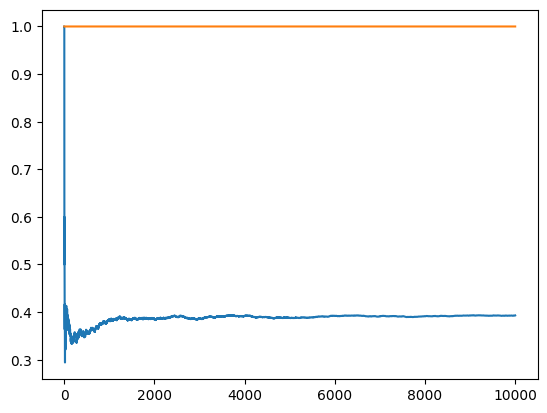

In [11]:
cuml_rewards = np.cumsum(rewards)
total_rewards = np.sum(rewards)

print(f'{total_rewards = }')
for b in bandits:
    print(f"mean estimate: {b.p_estimate:0.4f}")
win_rates = cuml_rewards / (np.arange(NUM_TRIALS) + 1)
plt.plot(win_rates, scaley=True)
plt.plot(np.ones(NUM_TRIALS))
plt.show()

## Epsilon Greedy Trials

We repeat the above experiment but, this time we try to calculate the probability p of win for each bandit, every time we pull. This way , in each trial , we pull the bandit which has the highest estimate of win.

In [27]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

eps = 0.1

rewards = []
explore_count = 0
exploit_count = 0
best_bandit = np.argmax([b.p for b in bandits])
num_optimal = 0

for trial in range(NUM_TRIALS):

  if np.random.random() < eps:
    explore_count += 1
    j = np.random.randint(len(bandits))
  else:
    exploit_count += 1
    j = np.argmax([b.p_estimate for b in bandits])

  if j == best_bandit:
    num_optimal += 1

  x = bandits[j].pull()

  rewards.append(x)

  bandits[j].update(x)

total_rewards = 6663
mean estimate:0.6969
mean estimate:0.3190
mean estimate:0.1424
exploit_count = 8963
explore_count = 1037


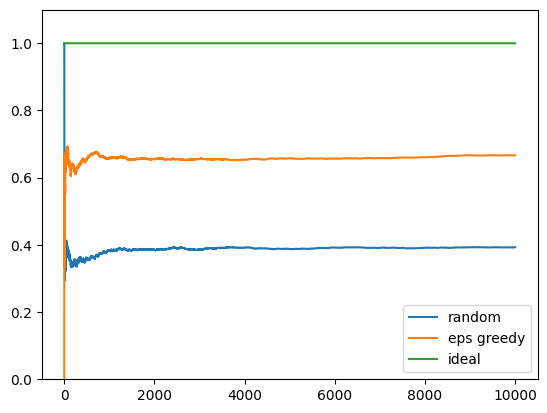

In [28]:
cum_epg_rewards = np.cumsum(rewards)
total_rewards = np.sum(rewards)

print(f'{total_rewards = }')

for b in bandits:
    print(f"mean estimate:{b.p_estimate:.4f}")

print(f'{exploit_count = }')
print(f'{explore_count = }')

win_rates_epg = cum_epg_rewards / (np.arange(NUM_TRIALS) + 1)

fig, ax = plt.subplots()
ax.plot(np.arange(NUM_TRIALS), win_rates, label="random")
ax.plot(np.arange(NUM_TRIALS), win_rates_epg, label="eps greedy")
ax.plot(np.arange(NUM_TRIALS), np.ones(NUM_TRIALS), label="ideal")
ax.set_ylim(0, 1.1)
ax.legend()